# Унитарни простори

<div>
   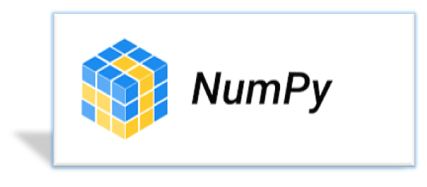  
</div>

**Садржај:**
1. [Скаларни производ `dot`](#Скаларни-производ)
1. [Транспоновање вектора и матрица](#Транспоновање-вектора-и-матрица)
1. [Множење матрица `@` и `outer`](#Множење-матрица)
1. [Инверзна матрица и детерминанта `linalg.inv` i `linalg.det`](#Инверзна-матрица-и-детерминанте)
1. [Траг матрице `trace`](#Траг-матрице)

In [1]:
import numpy as np
import numpy.linalg as npl
import numpy.random as rndm
from timeit import default_timer as timer

***

У овом одељку бавићемо се основним својствима унитарних и нормираних простора. Уграђене функције библиотеке NumPy које су обрађене дате су наредном табелом.

|Операција|Симбол|Име на енглеском|
|---:|:---:|:---|
|Унутрашњи производ|`dot()`|Inner product|
|Комплексни скаларни производ|`vdot()`|Complex inner product|
|Суме |`einsum`|Einstein summation |
|Множење матрица|`@`|Multiplication|
|Спољашњи производ вектора|`outer()`|Outer product|
|Детерминаната|`linalg.det()`|Determinant|
|Инверзна матрица|`linalg.inv()`|Inverse matrix|
|Решење матричне једначине $AX=B$|`linalg.solve(A,B)`|Solution/ Solve|
|Ранг матрице|`linalg.matrix_rank(A)`|Matrix rank|
|Траг матрице|`trace()`|Matrix Trace|

***

### Скаларни производ

 Веома корисна операција над векторима којом могу да се уведу углови и растојања међу векторе је скаларни производ. 

**Дефиниција 1.** Нека је $V$ векторски простор над пољем скалара $\mathbb{R}.$ Пресликавање $\langle\cdot,\cdot\rangle:V\times V\to\mathbb{R}$ назива се **реалан скаларни производ** на $V$ уколико за произвољна три вектора $u,v,w\in V$ и произвољан скалар $\alpha\in\mathbb{R},$ ова функција има особине:
- [S1:] $\langle u,v\rangle=\langle v,u\rangle;$
- [S2:] $\langle \alpha u,v\rangle=\alpha\langle u,v\rangle;$
- [S3:] $\langle u+v,w\rangle=\langle u,w\rangle+\langle v,w\rangle;$
- [S4:] $\langle u,u\rangle>0, u\neq\theta.$

**Дефиниција 2.** Нека је $V$ векторски простор над пољем скалара $\mathbb{C}.$ Пресликавање $\langle\cdot,\cdot\rangle:V\times V\to\mathbb{C}$ назива се **комплексни скаларни производ** на $V$ уколико за произвољна три вектора $u,v,w\in V$ и произвољан скалар $\alpha\in\mathbb{C},$ ова функција има особине:
- [U1:] $\langle u,v\rangle=\overline{\langle v,u\rangle};$
- [U2:] $\langle \alpha u,v\rangle=\alpha\langle u,v\rangle;$
- [U3:] $\langle u+v,w\rangle=\langle u,w\rangle+\langle v,w\rangle;$
- [U4:] $\langle u,u\rangle>0, u\neq\theta.$

Векторски простор снабдевен операцијом скаларног производа називамо **унитаран простор**. 

***

**Дерфиниција 3.** Вектори $v$ и $u$ су **ортогонални** (orthogonal) ако је њихов скаларни производ једнак нули. 
$$v\perp u\quad\Longleftrightarrow\quad v\cdot u=0.$$

Два скупа вектора $S_1$ и $S_2$ су ортогонална, у ознаци $S_1\perp S_2,$ ако важи
$$ v\in S_1,u\in S_2\qquad\Longrightarrow\qquad v\cdot u=0.$$

Особина ортогоналности је симетрична, тј. $S_1\perp S_2\ \Longleftrightarrow\ S_2\perp S_1.$

***

**Стандардни скаларни производ** уређених $n-$торки реалних бројева гласи 
$$(x_0,x_1,\dots,x_{n-1})\cdot(y_0,y_1,\dots,y_{n-1})=\sum_{k=0}^{n-1}x_ky_k.$$

У случају комплексних вектора стандардни скаларни производ гласи
$$(x_0,x_1,\dots,x_{n-1})\cdot(y_0,y_1,\dots,y_{n-1})=\sum_{k=0}^{n-1}x_k\overline{y_k}.$$

Стандардни скаларни производ обележаваћемо специјално симболом $\cdot.$

**Задатак 1.** Испитати тачност следећих тврђења.

а) У $2D:$ ако је вектор $v$ ортогоналан на векторе $u$ и $w,$ онда су $u$ и $w$ паралелни међу собом.

б) У $3D:$ ако је вектор $v$ ортогоналан на векторе $u$ и $w,$ онда су $u$ и $w$ паралелни међу собом.

в) Ако је вектор $v$ ортогоналан на векторе $u$ и $w,$ онда је $v$ ортогоналан на $3u-w.$

**Решење :**

а) Уведимо координате вектора $v=\begin{bmatrix}a&b\end{bmatrix}.$ Потражимо све векторе ортогоналне на $v.$
\begin{align}
u&=\begin{bmatrix}x_u&y_u\end{bmatrix},\\
v\cdot u&=ax_u+by_u=0\quad\Longrightarrow\quad y_u=-\dfrac{b}{a}\,x_u,\ a\neq0.
\end{align}
Закључујемо да вектори $u$ и $w$ морају да подлежу истом правилу за координате
$$u=\begin{bmatrix}x_u&-\dfrac{b}{a}\,x_u\end{bmatrix}=\dfrac{x_u}{a}\begin{bmatrix}a&-b\end{bmatrix},\qquad 
w=\begin{bmatrix}x_w&-\dfrac{b}{a}\,x_w\end{bmatrix}=\dfrac{x_w}{a}\begin{bmatrix}a&-b\end{bmatrix}.
$$
Вектори $u$ и $w$ су паралелни (линеарно зависни) с обзиром да важи $w=\dfrac{x_w}{x_u}u=\lambda u.$

Тврђење је последица димензионалности простора. Постоје највише два линеарно независна правца, због тога постоје највише два међусобно ортогонална правца.

б) У $3D$ и вишедимензионалним просторима ово тврђење није тачно због могућности одређивања више ортогоналних (линеарно независних) праваца. Нпр. елементи канонске базе $\begin{bmatrix}1&0&0\end{bmatrix},$ $\begin{bmatrix}0&1&0\end{bmatrix},$
$\begin{bmatrix}0&0&1\end{bmatrix}.$

в) С обзиром да се операција скаларног производа слаже са основним операцијама векторског простора тврђење је тачно.
\begin{align}
&v\perp u,w\quad\Longleftrightarrow\quad v\cdot u=0,\ v\cdot w=0,\\
&v\cdot(3u-w)=3(v\cdot u)-(v\cdot w)=0\quad\Longleftrightarrow\quad v\perp(3u-w).
\end{align}

***

**Задатак 2.** За вектор $v\in\mathbb{R}^n$ кажемо да је ненегативан уколико су све његове компоненте ненегативни бројеви. То ћемо означавати краће $v\geq0.$ 

а) Показати да за $v,u\in\mathbb{R}^n,$ $v,u\geq0$ важи $v\cdot u\geq0.$ 

б) Описати ситуацију када за ненегативне векторе $v\geq0$ и $u\geq0$ важи ортогоналност, тј. да је $v\cdot u=0.$ Ваш одговор треба да буде у контексту шаблона појављивања нула међу компонентама ових вектора.

**Решење :**

а) Уведимо ознаке координата вектора $v,u\in\mathbb{R}^n,$
$$v=\begin{bmatrix}x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T,\quad x_i\geq0,\qquad\qquad
u=\begin{bmatrix}y_0&y_1&\dots&y_{n-1}\end{bmatrix}^T,\quad y_i\geq0.$$
Тада је $$x_iy_i\geq0,\ \forall i\quad\Longrightarrow\quad v\cdot u=\displaystyle\sum_{i=0}^{n-1}x_iy_i\geq0.$$

б) Израз $v\cdot u=\displaystyle\sum_{i=1}^nx_iy_i=0$ акко је $x_iy_i=0,\ \forall i.$ Закључујемо да бар једна од вредности компоненти вектора $v$ и $u$ мора да буде једнака нули у сваком од ових производа. Другим речима, уколико је компонента $x_i>0$ тада мора да буде $y_i=0,$ и обрат. Појављивање ненула вредности у компоненетама ових вектора једна другу искључује. На тај начин постоји одређена негативна повезаност између карактеристика које ови вектори описују.

***

|Операција|Симбол|Име на енглеском|
|---:|:---:|:---|
|Rеалан скаларни производ|`dot()`|Inner product|
|Rеалан скаларни производ|`inner()`|Inner product|
|Kомплексан скаларни производ|`vdot()`|Complex inner product|

**Пример 1.** Операција којом се у NumPy библиотеци израчунава стандардни скаларни производ реалних вектора је `dot`.

In [2]:
v=np.array([2,-1,2,1])
u=np.array([1,0,1,-1])
print("v=",v," , ","u=",u)
print(v.shape)
print(u.shape)
np.dot(v,u), np.inner(v,u)   #skalarni proizvod jednodimenzionalnih vektora

v= [ 2 -1  2  1]  ,  u= [ 1  0  1 -1]
(4,)
(4,)


(3, 3)

Реални скаларни производ је комутативна операција.

In [3]:
np.dot(u,v)  # skalarni proizvod je komutativna operacija 

3

Имплементиране функције се разликују приликом примене на вишедимензионалне низове. О томе можете више да нађете у документационом центру библиотеке.

In [4]:
v.reshape(2,2),u.reshape(2,2)

(array([[ 2, -1],
        [ 2,  1]]),
 array([[ 1,  0],
        [ 1, -1]]))

In [5]:
np.dot(v.reshape(2,2),u.reshape(2,2))

array([[ 1,  1],
       [ 3, -1]])

In [6]:
np.inner(v.reshape(2,2),u.reshape(2,2))

array([[2, 3],
       [2, 1]])

За комплексне векторе и стандардни скаларни производ користимо уграђену функцију `vdot`. 

In [7]:
vc=v+1j
uc=u-1j
print("vc=",vc," , ","uc=",uc)

np.vdot(vc,uc) , np.vdot(uc,vc)

vc= [ 2.+1.j -1.+1.j  2.+1.j  1.+1.j]  ,  uc= [ 1.-1.j  0.-1.j  1.-1.j -1.-1.j]


((-1-5j), (-1+5j))

Комплексни скаларни производ није комутативна операција.

***

**Пример 2.** Постоји у NumPy библиотеци уграђена функција `einsum` којом могу да се спроводе различите врсте сумирања над низовима. Произашла је као имплементација [Ајнштајнове скраћене нотације за сумирање](https://en.wikipedia.org/wiki/Einstein_notation). Упознаћемо `einsum` кроз примере. 

Када `einsum` има само један низ као аргумент, ова наредба врши његов испис. Том приликом наводе се димензије тог низа кроз имена индекса.

In [8]:
np.einsum('i',v)

array([ 2, -1,  2,  1])

In [9]:
np.einsum(v,[0])

array([ 2, -1,  2,  1])

In [10]:
A=rndm.randint(-3,4,(4,4))
print(A)

[[-3  0  2  2]
 [-3  3  1 -3]
 [-2  2  0  1]
 [ 3  0 -3 -3]]


In [11]:
np.einsum('ij',A)

array([[-3,  0,  2,  2],
       [-3,  3,  1, -3],
       [-2,  2,  0,  1],
       [ 3,  0, -3, -3]])

In [12]:
np.einsum(A,[0,1])

array([[-3,  0,  2,  2],
       [-3,  3,  1, -3],
       [-2,  2,  0,  1],
       [ 3,  0, -3, -3]])

Да би се добио збир елемената низа користимо експлицитну форму ове наредбе где описујемо везу димензија улаза и излаза користећи `->` или кроз опциони аргумент за димензионалност излаза.

In [13]:
np.einsum('i->',v) , np.einsum(v,[0],[])

(4, 4)

In [14]:
np.sum(v)

4

In [15]:
np.einsum('ij->',A) , np.einsum(A,[0,1],[])

(-3, -3)

In [16]:
np.sum(A)

-3

Испис дијагоналних елемената добијамо навођењем да се користе исте вредности оба индекса као и да тај индекс одређује димензију излаза.

In [17]:
np.einsum('ii->i',A)

array([-3,  3,  0, -3])

In [18]:
np.einsum(A,[0,0],[0])

array([-3,  3,  0, -3])

In [19]:
np.diag(A)

array([-3,  3,  0, -3])

Сабирање дуж врста или колона се на сличан начин покреће.

In [20]:
np.einsum('ij->i',A), np.sum(A,axis=1)

(array([ 1, -2,  1, -3]), array([ 1, -2,  1, -3]))

In [21]:
np.einsum(A,[0,1],[0])

array([ 1, -2,  1, -3])

In [22]:
np.einsum('ij->j',A), np.sum(A,axis=0)

(array([-5,  5,  0, -3]), array([-5,  5,  0, -3]))

In [23]:
np.einsum(A,[0,1],[1])

array([-5,  5,  0, -3])

Стандардни реалан скаларни производ вектора може да се рачуна применом наредбе `einsum` у имплицитном облику. Навођењем истог имена индекса два пута обележава се димензија по којој се врши сабирање у изразу `v*u`.

In [24]:
np.einsum('i,i',v,u) , np.einsum('i,i->',v,u)

(3, 3)

In [25]:
np.einsum(v,[0],u,[0]) , np.einsum(v,[0],u,[0],)

(3, 3)

In [26]:
np.einsum('i,i->i',v,u) , v*u

(array([ 2,  0,  2, -1]), array([ 2,  0,  2, -1]))

In [27]:
np.einsum(v,[0],u,[0],[0])

array([ 2,  0,  2, -1])

Функција `einsum` кроз имплицитни и експлицитни облик може да се користи и за многе друге операције над низовима. Неке од њих упознаћемо кроз примере у наставку.

***

**Пример 3.** Приметимо да матрице можемо векторизовањем да поистоветимо са дугим векторима. Тада се израчунавање стандардног скаларног производа две матрице аналогно спроводи.
$$\langle A, B\rangle=\left\langle\begin{bmatrix}a_{00}&a_{01}&\dots&a_{0n}\\a_{10}&a_{11}&\dots&a_{1n}\\
\vdots&\vdots&&\vdots\\a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix},
\begin{bmatrix}b_{00}&b_{01}&\dots&b_{0n}\\b_{10}&b_{11}&\dots&b_{1n}\\
\vdots&\vdots&&\vdots\\b_{m0}&b_{m1}&\dots&b_{mn}\end{bmatrix}\right\rangle
=\sum_{i=0}^m\sum_{j=0}^na_{ij}b_{ij}.$$
Овако дефинисан скаларни производ матрица познат је и као [Фробенијусов скаларни производ](https://en.wikipedia.org/wiki/Frobenius_inner_product).

In [28]:
A=np.array([[1,2,3],[-1,-2,-3]])
B=np.array([[0,1,0],[-3,1,3]])
np.sum(A*B)

-6

In [29]:
np.dot(A.reshape(6,),B.reshape(6,))

-6

Да би користили функцију `einsum` потребно је назначити да се сумирање врши по два индекса, тј. навести дупло имена два индекса сумирања.

In [30]:
np.einsum('ij,ij',A,B)

-6

In [31]:
np.einsum(A,[0,1],B,[0,1])

-6

In [32]:
np.einsum('ij,ij->',A,B)

-6

In [33]:
np.einsum(A,[0,1],B,[0,1],[])

-6

Фробенијусов скаларни производ можемо да посматрамо и кроз векторе-врсте или векторе-колоне датих матрица. У том контексту је збир скаларних производа парова одговарајућих вектора. Показаћемо на примеру вектора-колона, за векторе-врсте поступак је аналоган.

\begin{align}
&A=\begin{bmatrix} \begin{bmatrix} a_{00}\\ a_{10}\\ \vdots\\ a_{m0}\end{bmatrix} &
\begin{bmatrix} a_{01}\\ a_{11}\\ \vdots\\ a_{m1} \end{bmatrix} &\dots&
\begin{bmatrix} a_{0n}\\ a_{1n}\\ \vdots\\ a_{mn}\end{bmatrix} \end{bmatrix}
=
\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
a_0&a_1&\dots&a_{n}\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right],\\
&B=\begin{bmatrix} \begin{bmatrix} b_{00}\\ b_{10}\\ \vdots\\ b_{m0}\end{bmatrix} &
\begin{bmatrix} b_{01}\\ b_{11}\\ \vdots\\ b_{m1} \end{bmatrix} &\dots&
\begin{bmatrix} b_{0n}\\ b_{1n}\\ \vdots\\ b_{mn}\end{bmatrix} \end{bmatrix}
=
\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
b_0&b_1&\dots&b_{n}\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right],\\
&a_j\cdot b_j=\displaystyle\sum_{i=0}^ma_{ij}b_{ij}
\quad\Longrightarrow\quad
\langle A, B\rangle=\sum_{i=0}^m\sum_{j=0}^na_{ij}b_{ij}=\sum_{j=0}^n\sum_{i=0}^ma_{ij}b_{ij}
=\sum_{j=0}^n(a_j\cdot b_j).
\end{align}

На примеру конкретних матрица спровешћемо скаларне производе парова вектора-колона.

In [34]:
np.sum(A*B,axis=0)

array([ 3,  0, -9])

Сабирањем ових скаларних производа налазимо Фробенијусов скаларни производ матрица.

In [35]:
np.sum(np.sum(A*B,axis=0))

-6

Израчунавање скаларних производа парова вектора-колона две матрице можемо да спроведемо и кроз `einsum`. 

In [36]:
np.einsum('ij,ij->j',A,B)

array([ 3,  0, -9])

In [37]:
np.einsum(A,[0,1],B,[0,1],[1])

array([ 3,  0, -9])

Слично, скаларни производи вектора-врста дају Фробенијусов скаларни производ матрица.

In [38]:
np.sum(A*B,axis=1)

array([ 2, -8])

In [39]:
np.einsum('ij,ij->i',A,B)

array([ 2, -8])

In [40]:
np.einsum(A,[0,1],B,[0,1],[0])

array([ 2, -8])

In [41]:
np.sum(np.sum(A*B,axis=1))

-6

***

### Транспоновање вектора и матрица

Осим операција векторских простора матрице су снабдевене и операцијом транспоновања.
$$A=[a_{ij}]_{m\times n}=\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0n}\\
a_{10}&a_{11}&\dots&a_{1n}\\\vdots&\vdots&&\vdots \\ 
a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix},\qquad
A^T=[a_{ji}]_{n\times m}=\begin{bmatrix} a_{00}&a_{10}&\dots&a_{m0}\\
a_{01}&a_{11}&\dots&a_{m1}\\\vdots&\vdots&&\vdots \\ 
a_{0n}&a_{1n}&\dots&a_{mn}\end{bmatrix}.$$

Познато је да се транспоновање слаже са операцијама сабирања и скалирања матрица.
$$(\lambda A)^T=\lambda A^T,\qquad (A+B)^T=A^T+B^T.$$

**Пример 4.** Функција `transpose()` и атрибут `.T` имају ефекта само над матрицама, тј. вишедимензионалним низовима. Уколико се транспоновање примени на једнодимензионални NumPy низ неће произвести никакав ефекат.

In [42]:
print(v)
print(v.shape)     #v je jednodimenzionalni niz 
np.transpose(v)                   

[ 2 -1  2  1]
(4,)


array([ 2, -1,  2,  1])

In [43]:
print(v.T)
print((v.T).shape)

[ 2 -1  2  1]
(4,)


In [44]:
np.transpose([v])                 #[v] je dvodimenzionalni niz 1x4 pod dejstvom naredbe transpose

array([[ 2],
       [-1],
       [ 2],
       [ 1]])

In [45]:
(v.reshape(1,4)).T

array([[ 2],
       [-1],
       [ 2],
       [ 1]])

In [46]:
v[None,:].T

array([[ 2],
       [-1],
       [ 2],
       [ 1]])

In [47]:
v[:,None].T

array([[ 2, -1,  2,  1]])

In [48]:
kolona=np.array([[1+1j],[2],[3],[3-2j]])
np.transpose(kolona)

array([[1.+1.j, 2.+0.j, 3.+0.j, 3.-2.j]])

In [49]:
print(kolona)
(kolona.conj()).T   #konjugovano transponovanje

[[1.+1.j]
 [2.+0.j]
 [3.+0.j]
 [3.-2.j]]


array([[1.-1.j, 2.-0.j, 3.-0.j, 3.+2.j]])

In [50]:
A = np.array([[1,2,3],[3,4,5]]) 
print(A)
np.transpose(A)

[[1 2 3]
 [3 4 5]]


array([[1, 3],
       [2, 4],
       [3, 5]])

In [51]:
A.T

array([[1, 3],
       [2, 4],
       [3, 5]])

Позивање функције `einsum` над једним низом може да се искористи за транспоновање матрица. Заменом редоследа имена индекса назначава се замена улога одговарајућих димензија низа.

In [52]:
np.einsum('ij->ji',A)

array([[1, 3],
       [2, 4],
       [3, 5]])

In [53]:
np.einsum(A,[0,1],[1,0])

array([[1, 3],
       [2, 4],
       [3, 5]])

***

**Пример 5.** За Фробенијусов скаларни проивод важи $\langle A, B\rangle=\langle A^T, B^T\rangle.$ Заиста, како је
$$\langle A, B\rangle=\left\langle\begin{bmatrix}a_{00}&a_{01}&\dots&a_{0n}\\a_{10}&a_{11}&\dots&a_{1n}\\
\vdots&\vdots&&\vdots\\a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix},
\begin{bmatrix}b_{00}&b_{01}&\dots&b_{0n}\\b_{10}&b_{11}&\dots&b_{1n}\\
\vdots&\vdots&&\vdots\\b_{m0}&b_{m1}&\dots&b_{mn}\end{bmatrix}\right\rangle
=\sum_{i=0}^m\sum_{j=0}^na_{ij}b_{ij}$$ и
$$\langle A^T, B^T\rangle=\left\langle\begin{bmatrix}a_{00}&a_{10}&\dots&a_{m0}\\a_{01}&a_{11}&\dots&a_{m1}\\
\vdots&\vdots&&\vdots\\a_{0n}&a_{1n}&\dots&a_{mn}\end{bmatrix},
\begin{bmatrix}b_{00}&b_{10}&\dots&b_{m0}\\b_{01}&b_{11}&\dots&b_{m1}\\
\vdots&\vdots&&\vdots\\b_{0n}&b_{1n}&\dots&b_{mn}\end{bmatrix}\right\rangle
=\sum_{j=0}^n\sum_{i=0}^m a_{ij}b_{ij},$$
због комутативности и асоцијативности сабирања ради се о истим изразима.

In [54]:
A=rndm.randint(-3,3,(3,4))
B=rndm.randint(-3,3,(3,4))
print(A)
print(B)

[[-1  1  1 -3]
 [-1 -3 -1 -3]
 [-2  0  1 -1]]
[[ 1  1 -3  1]
 [-2  0  1  2]
 [ 0  0 -3 -1]]


In [55]:
np.sum(A*B)

-13

In [56]:
np.sum(A.T*B.T)

-13

***

## Множење матрица

Стандардни скаларни производ два реална вектора је у тесној вези са још једном операцијом [множења матрица](https://en.wikipedia.org/wiki/Matrix_multiplication). Шта више, стандардни скаларни производ може да се представи као матрични производ вектора-врсте и вектора-колоне истих дужина. Ову операцију још зовемо и **унутрашњи производ** два вектора.

**Унутрашњи (скаларни) производ вектора:** $\qquad v^Tu=\begin{bmatrix}x_0&x_1&\dots&x_{n}\end{bmatrix}\begin{bmatrix}y_0\\y_1\\\vdots\\y_{n}\end{bmatrix}=\displaystyle\sum_{k=0}^{n}x_ky_k,$
<p>&nbsp;</p>

Производ две матрице је матрица састављена од свих скаларних производа вектора-врста леве и вектора-колона десне матрице чинилаца. 

**Производ две матрице**  $\qquad AB=\begin{bmatrix}a_{00}&a_{01}&\dots&a_{0n}\\a_{10}&a_{11}&\dots&a_{1n}\\
\vdots&\vdots&&\vdots\\a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}
\begin{bmatrix}b_{00}&b_{01}&\dots&b_{0p}\\b_{10}&b_{11}&\dots&b_{1p}\\
\vdots&\vdots&&\vdots\\b_{n0}&b_{n1}&\dots&b_{np}\end{bmatrix}
=\begin{bmatrix}c_{00}&c_{01}&\dots&c_{0p}\\c_{10}&c_{11}&\dots&c_{1p}\\
\vdots&\vdots&&\vdots\\c_{m0}&c_{m1}&\dots&c_{mp}\end{bmatrix}$
<p>&nbsp;</p>
$$\mbox{где су }\qquad c_{ij}=\begin{bmatrix}a_{i0}&a_{i1}&\dots&a_{in}\end{bmatrix}\begin{bmatrix}b_{0j}\\b_{1j}\\\vdots\\b_{nj}\end{bmatrix},
\quad i=0,1,\dots,m,\quad j=0,1,\dots,n.$$

Због оваквог начина дефинисања, производ матрица је могуће спровести под условом да је испоштовано правило унутрашњег индекса:
	$$\begin{bmatrix} & & &\\ &m&\mbox{vrsta}&\\ &n&\mbox{kolona}&\\ &&&\end{bmatrix}_{m\times \underline{n}}\,
	\begin{bmatrix} & & &\\ &n&\mbox{vrsta}&\\ &p&\mbox{kolona}&\\ &&&\end{bmatrix}_{\underline{n}\times p}
	=\begin{bmatrix}& & &\\ &m&\mbox{vrsta}&\\ &p&\mbox{kolona}&\\ &&&\end{bmatrix}_{m\times p}.$$

|Операција|Симбол|Име на енглеском|
|---:|:---:|:---|
|Множење матрица|`@`|Multiplication|
|Спољашњи производ вектора|`outer()`|Outer product|

**Пример 6.** Симбол у NumPy-у за множење две матрице је `@`.

In [57]:
A = np.array([[1,2,3],[3,4,5]]) 
B=np.array([[1,2],[3,4]])
B@A

array([[ 7, 10, 13],
       [15, 22, 29]])

Иако `dot` функција може да се примењује и у својству производа `@`, препорука је да се множење две матрице обавља позивом ове друге наредбе  `@`.

In [58]:
np.dot(B,A) 

array([[ 7, 10, 13],
       [15, 22, 29]])

In [59]:
v=np.array([2,-1,2,1])
u=np.array([1,0,1,-1])
np.dot(v,u)

3

In [60]:
np.dot(v.reshape(1,4),u.reshape(4,1)) #unutrašnji proizvod vektora-vrste i vektora-kolone, v^Tu

array([[3]])

In [61]:
v@u  #operacija proizvoda matrica deluje kao skalarni proizvod na jednodimenzionalne vektore istih dužina

3

Zaključujemo da za izračunavanje skalarnog proizvoda, tj. rezultata koji će dati baš broj, a ne niz, treba voditi računa o broju dimenzija činilaca. Osim toga, funkcije `dot` i `@` imaju jednak  efekat u analiziranim situacijama.

***

**Пример 7.** Функцијом `einsum` може да се искаже операција производа две матрице.

In [62]:
B@A

array([[ 7, 10, 13],
       [15, 22, 29]])

In [63]:
np.einsum('ij,jk',B,A)  , np.einsum('ij,jk->ik',B,A)

(array([[ 7, 10, 13],
        [15, 22, 29]]),
 array([[ 7, 10, 13],
        [15, 22, 29]]))

In [64]:
np.einsum(B,[0,1],A,[1,2]) , np.einsum(B,[0,1],A,[1,2],[0,2])

(array([[ 7, 10, 13],
        [15, 22, 29]]),
 array([[ 7, 10, 13],
        [15, 22, 29]]))

Навођењем различитих редоследа индекса можемо да укључимо и транспоновање у производ матрица.

In [65]:
np.einsum('jk,ki',B,A)  , np.einsum('jk,ki->ij',B,A)

(array([[ 7, 15],
        [10, 22],
        [13, 29]]),
 array([[ 7, 15],
        [10, 22],
        [13, 29]]))

In [66]:
np.einsum(B,[1,2],A,[2,0]) , np.einsum(B,[1,2],A,[2,0],[0,2])

(array([[ 7, 15],
        [10, 22],
        [13, 29]]),
 array([[ 4, 18],
        [ 8, 24],
        [12, 30]]))

In [67]:
(B@A).T

array([[ 7, 15],
       [10, 22],
       [13, 29]])

In [68]:
np.einsum('ij,ik',A,B)  , np.einsum('ij,ik->jk',A,B)

(array([[10, 14],
        [14, 20],
        [18, 26]]),
 array([[10, 14],
        [14, 20],
        [18, 26]]))

In [69]:
np.einsum(A,[0,1],B,[0,2]) , np.einsum(A,[0,1],B,[0,2],[1,2])

(array([[10, 14],
        [14, 20],
        [18, 26]]),
 array([[10, 14],
        [14, 20],
        [18, 26]]))

In [70]:
A.T@B

array([[10, 14],
       [14, 20],
       [18, 26]])

***

**Пример 8.** У примеру 3 успостављена је веза између Фробенијусовог скаларног производа матрица и стандардних скаларних производа вектора-колона, однoсно вектора-врста.

\begin{align}
&A=
\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
a_0&a_1&\dots&a_{n}\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right]
=\left[\begin{array}{ccc}
\phantom{W}&v_0^T&\phantom{W}\\\hline
\phantom{W}&v_1^T&\phantom{W}\\\hline
\phantom{W}&\vdots&\phantom{W}\\\hline
\phantom{W}&v_m^T&\phantom{W}
\end{array}\right],\\
&B=
\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
b_0&b_1&\dots&b_{n}\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right]=\left[\begin{array}{ccc}
\phantom{W}&u_0^T&\phantom{W}\\\hline
\phantom{W}&u_1^T&\phantom{W}\\\hline
\phantom{W}&\vdots&\phantom{W}\\\hline
\phantom{W}&u_m^T&\phantom{W}
\end{array}\right],\\
&\langle A, B\rangle=\sum_{i=0}^m\sum_{j=0}^na_{ij}b_{ij}
=\sum_{j=0}^n(a_j\cdot b_j)=\sum_{i=0}^m(v_i\cdot u_i).
\end{align}

Скаларне производе парова колона користи и матрични производ $A^TB\in\mathcal{M}_{n\times n},$ док скаларне производе врста садржи производ $AB^T\in\mathcal{M}_{m\times m}.$

***

Operacija množenja matrica se slaže sa ostalim operacijama nad njima na sledeći način:
$$(\lambda A)B=\lambda(AB),\qquad (A+B)C=AC+BC,\qquad (AB)^T=B^TA^T.$$

Zbog kompleksnog skalarnog proizvoda uvodi se još i oznaka konjugovanog transponovanje $A^H=\overline{A}^T=\overline{A^T}.$ Za nju važi:
$$v\cdot u=u^Hv,\qquad (\lambda A)^H=\overline{\lambda}A^H,\qquad (AB)^H=B^HA^H.$$

Operacija množenja dve matrice shodno načinu izračunavanja (skalarni proizvodi vrsta i kolona) koristi razbijanje matrice na skupove vektora: skup vektora-kolona ili vektora-vrsta. 
$$A=\begin{bmatrix} \begin{bmatrix} a_{00}\\ a_{10}\\ \vdots\\ a_{m0}\end{bmatrix} &
\begin{bmatrix} a_{01}\\ a_{11}\\ \vdots\\ a_{m1} \end{bmatrix} &\dots&
\begin{bmatrix} a_{0n}\\ a_{1n}\\ \vdots\\ a_{mn}\end{bmatrix} \end{bmatrix},\qquad 
A=\begin{bmatrix} \begin{bmatrix}\ a_{00}&\ a_{01}&\dots&\ a_{0n}\end{bmatrix}\\[8pt]
\begin{bmatrix}\ a_{10}&\ a_{11}&\dots&\ a_{1n}\end{bmatrix}\\  \vdots \\ 
\begin{bmatrix} a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}\end{bmatrix}.$$

Na taj način osnovni elementi vektorskih prostora (linearne kombinacije, lineali,...) dobijaju svoj matrični zapis.

**Proizvod matrice i vektora** je matrični zapis **linearne kombinacije vektora** kolona te matrice.

\begin{align} Av&=\begin{bmatrix}a_{00}&a_{01}&\dots&a_{0n}\\a_{10}&a_{11}&\dots&a_{1n}\\
\vdots&\vdots&&\vdots\\a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}\begin{bmatrix}x_0\\x_1\\\vdots\\x_n\end{bmatrix}
=\begin{bmatrix}x_0a_{00}+x_1a_{01}+\dots+x_na_{0n}\\
x_0a_{10}+x_1a_{11}+\dots+x_na_{1n}\\
\vdots\\x_0a_{m0}+x_1a_{m1}+\dots+x_na_{mn}\end{bmatrix}
\\[10pt]
&=x_0\begin{bmatrix}a_{00}\\a_{10}\\\vdots\\a_{m0}\end{bmatrix}+x_1\begin{bmatrix}a_{01}\\a_{11}\\\vdots\\a_{m1}\end{bmatrix}
+\dots+x_n\begin{bmatrix}a_{0n}\\a_{1n}\\\vdots\\a_{mn}\end{bmatrix}
.
\end{align}

**Пример 9.** На конкретном примеру матрице и вектора показаћемо ову једнакост.

In [71]:
A=np.array([[1,2,3],[0,1,-1]])
v=np.array([-2,1,3])
A@v

array([ 9, -2])

In [72]:
v[0]*A[:,0]+v[1]*A[:,1]+v[2]*A[:,2]

array([ 9, -2])

***

**Пример 10.** Производ матрице и вектора исказаћемо и уграђеном функцијом `einsum`.

In [73]:
A=rndm.randint(-3,3,(4,5))
v=rndm.randint(-3,3,5)
print(A)
print(v)

[[ 2  0  1  2 -1]
 [ 0 -2  0  1  1]
 [ 2  2  0  1 -2]
 [-1 -2 -3 -1 -3]]
[ 2  0 -1 -1 -3]


In [74]:
A@v

array([ 4, -4,  9, 11])

In [75]:
np.einsum('ij,j',A,v) , np.einsum('ij,j->i',A,v)

(array([ 4, -4,  9, 11]), array([ 4, -4,  9, 11]))

In [76]:
np.einsum(A,[0,1],v,[1]) , np.einsum(A,[0,1],v,[1],[0])

(array([ 4, -4,  9, 11]), array([ 4, -4,  9, 11]))

***

Zbog operacije matrica$\cdot$vektor proizvod dve matrice $C=AB$ sadrži linearne kombinacije vektora kolona matrice $A.$ Neka su $A\in\mathcal{M}_{(m+1)\times(n+1)}$ i  $B\in\mathcal{M}_{(n+1)\times(p+1)}.$
\begin{align}
	    AB&=\begin{bmatrix}&&&&\\&&A&&\\&&&&\end{bmatrix}
        \begin{bmatrix} \begin{bmatrix} b_{00}\\ b_{10}\\ \vdots\\ b_{n0}\end{bmatrix} &
	\begin{bmatrix} b_{01}\\ b_{11}\\ \vdots\\ b_{n1} \end{bmatrix} &\dots&
	\begin{bmatrix} b_{0p}\\ b_{1p}\\ \vdots\\ b_{np}\end{bmatrix} \end{bmatrix}\\
	&=\begin{bmatrix} A\!\begin{bmatrix} b_{00}\\ b_{10}\\ \vdots\\ b_{n0}\end{bmatrix} &
	A\!\begin{bmatrix} b_{01}\\ b_{11}\\ \vdots\\ b_{n1} \end{bmatrix} &\dots&
	A\!\begin{bmatrix} b_{0p}\\ b_{1p}\\ \vdots\\ b_{np}\end{bmatrix} \end{bmatrix}.\tag{1}
\end{align}
	Prva kolona rezultujuće matrica dobija se u proizvodu matrice $A$ i prve kolone matrice $B,$ i tako redom. Množenje dve matrice može se tumačiti kao $p+1$ linearnih kombinacija kolona matrice $A$ čiji se rezultati čuvaju u kolonama matrice $C=AB\in\mathcal{M}_{(m+1)\times(p+1)}.$

**Пример 11.** На примеру две матрице показаћемо једнакост $(1).$

In [77]:
A=np.array([[1,2,3],[0,1,-1]])
B=np.array([[1,2],[2,1],[1,-1]])
A,B

(array([[ 1,  2,  3],
        [ 0,  1, -1]]),
 array([[ 1,  2],
        [ 2,  1],
        [ 1, -1]]))

In [78]:
A@B

array([[8, 1],
       [1, 2]])

In [79]:
A@B[:,0] , A@B[:,1]

(array([8, 1]), array([1, 2]))

***

Kako je $(AB)^T=B^TA^T$ to prethodno rečeno za proizvod $Av$ važi analogno i za proizvod oblika $v^TA^T.$ Drugim rečima, množenje matrice vektorom sa leve strane proizvodi linearne kombinacije vrsta te matrice.
$$\begin{array}{c}
u^TA=\begin{bmatrix} y_0&y_1&\dots&y_{m}\end{bmatrix} 
\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0n}\\
a_{10}&a_{11}&\dots&a_{1n}\\ \vdots&\vdots & &\vdots\\ 
a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}
=y_0\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0n}\end{bmatrix}+\\ \\
+y_1\begin{bmatrix} a_{10}&a_{11}&\dots&a_{1n}\end{bmatrix}+\dots+
y_m\begin{bmatrix} a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix},
\end{array}$$

$$AB=\begin{bmatrix} \begin{bmatrix}\ a_{00}&\ a_{01}&\dots&\ a_{0n}\end{bmatrix}\\ \\
	\begin{bmatrix}\ a_{10}&\ a_{11}&\dots&\ a_{1n}\end{bmatrix}\\  \vdots \\ 
	\begin{bmatrix} a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}\end{bmatrix}
    \begin{bmatrix}&&&&\\&&B&&\\&&&&\end{bmatrix}
	=\begin{bmatrix} \begin{bmatrix}\ a_{00}&\ a_{01}&\dots&\ a_{0n}\end{bmatrix} B\\ \\
	\begin{bmatrix}\ a_{10}&\ a_{11}&\dots&\ a_{1n}\end{bmatrix} B\\  \vdots \\ 
	\begin{bmatrix} a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix} B\end{bmatrix}.$$

**Primer 12.**  Možemo da povežemo deo-po-deo množenje vektora sa množenjem matrica posebnih karakteristika. Potražićemo proizvod dijagonalne matrice i vektora.  Neka su $v=\begin{bmatrix}x_0&x_1&\dots&x_n\end{bmatrix}^T$ i $u=\begin{bmatrix}y_0&y_1&\dots&y_n\end{bmatrix}^T.$
$${\rm diag}(u)\,v=\begin{bmatrix} y_0&0&\dots&0\\0&y_1&\dots&0\\&&\ddots&\\ 0&0&\dots&y_{n}\end{bmatrix}
\begin{bmatrix} x_0\\x_1\\\vdots\\x_{n}\end{bmatrix}
=\begin{bmatrix} y_0x_0\\y_1x_1\\ \vdots\\ y_{n}x_{n}\end{bmatrix}=v^T{\rm diag}(u).$$

In [80]:
u=np.array([1,2,3])
D=np.diag(u)
v=np.array([2,1,-1])
D@v , u*v

(array([ 2,  2, -3]), array([ 2,  2, -3]))

Zaključujemo da izraz ${\rm diag}(u)\,v$ predstavlja član-po-član množenje dva vektora. To je povod za narednu definciju. 

***

**Definicija 4.**      Za dva vektora sa $n+1$ komponenti 
$$v=\begin{bmatrix} x_0&x_1&\dots&x_{n}\end{bmatrix}^T\quad\mbox{ i }\quad u=\begin{bmatrix} y_0&y_1&\dots&y_{n}\end{bmatrix}^T,$$ 
operacija [Adamarovog množenja](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) vektora, tj. član-po-član proizvod vektora  dat je sa      
 $$
 u\circ v=\begin{bmatrix} x_0y_0&x_1y_1&\dots&x_{n}y_{n}
 \end{bmatrix}^T.
$$ 
 
 

**Primer 13.** Množenje matrice dijagonalnom matricom je operacija koja takođe ne zahteva puno formiranje matrica, tj. popunjavanje memorije nulama koje su elementi dijagonalne matrice.

In [81]:
u=np.array([-1,-2,2.3])
D=np.diag(u)
M=np.arange(6).reshape(2,3)
M, M@D  #mnozenje dijagonalnom matricom sa desne strane

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([[ 0. , -2. ,  4.6],
        [-3. , -8. , 11.5]]))

In [82]:
M*u

array([[-0. , -2. ,  4.6],
       [-3. , -8. , 11.5]])

In [83]:
v=np.array([2,-2])
D=np.diag(v)
M, D@M

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([[  0,   2,   4],
        [ -6,  -8, -10]]))

In [84]:
v.reshape(2,1)*M

array([[  0,   2,   4],
       [ -6,  -8, -10]])

Vidimo da za rad sa dijagonalnim matricama nije neophodno rezervisati pun memorijski prostor ove matrice. Dovoljno je poznavanje vektora dijagonalnih elemenata. Kodne skraćenice i brodkasting završavaju tražene operacije.

***

Od interesa je i da matričnom proizvodu vektora kolone i vektora vrste damo posebno ime

**Spoljašnji (tenzorski) proizvod vektora**   
$$vu^T=\begin{bmatrix}x_0\\x_1\\\vdots\\x_{m}\end{bmatrix}
\begin{bmatrix}y_0&y_1&\dots&y_n\end{bmatrix}=
\begin{bmatrix}x_0y_0&x_0y_1&\dots&x_0y_n\\
x_1y_0&x_1y_1&\dots&x_1y_n\\
\vdots&\vdots&&\vdots\\
x_my_0&x_my_1&\dots&x_my_n\end{bmatrix}
=\begin{bmatrix}y_0\begin{bmatrix} x_0\\x_1\\\vdots\\x_{m}\end{bmatrix} &
	y_1\begin{bmatrix} x_0\\x_1\\\vdots\\x_{m} \end{bmatrix} &\dots&
	y_n\begin{bmatrix} x_0\\x_1\\\vdots\\x_{m}\end{bmatrix} \end{bmatrix},$$ 
<p>&nbsp;</p>
kao rezulta daje matricu ranga $1$ s obzirom da su sve kolone jednake skaliranom vektoru $v.$ Primetimo i da su sve vrste jednake skaliranom vektoru $u^T.$
$$vu^T=\begin{bmatrix} x_0\begin{bmatrix} y_0&y_1&\dots&y_n\end{bmatrix}\\ \\
	x_1\begin{bmatrix} y_0&y_1&\dots&y_n\end{bmatrix}\\  \vdots \\ 
	x_m\begin{bmatrix} y_0&y_1&\dots&y_n\end{bmatrix}\end{bmatrix}.$$

Proizvod dve matrice $AB$ preko spoljašnjeg proizvoda vektora dat je sa
$$\begin{array}{rl}
	AB&=\begin{bmatrix} \begin{bmatrix} a_{00}\\ a_{10}\\ \vdots\\ a_{m0}\end{bmatrix} &
	\begin{bmatrix} a_{01}\\ a_{11}\\ \vdots\\ a_{m1} \end{bmatrix} &\dots&
	\begin{bmatrix} a_{0n}\\ a_{1n}\\ \vdots\\ a_{mn}\end{bmatrix} \end{bmatrix}
	\begin{bmatrix} \begin{bmatrix} b_{00}&\ b_{01}&\dots& b_{0p}\end{bmatrix}\\ \\
	\begin{bmatrix} b_{10}&\ b_{11}&\dots& b_{1p}\end{bmatrix}\\  \vdots \\ 
	\begin{bmatrix} b_{n0}&b_{n1}&\dots&b_{np}\end{bmatrix}\end{bmatrix}\\
	&=\begin{bmatrix} a_{00}\\ a_{10}\\ \vdots\\ a_{m0}\end{bmatrix}
	 \begin{bmatrix} b_{00}&\ b_{01}&\dots& b_{0p}\end{bmatrix}+
	 \begin{bmatrix} a_{01}\\ a_{11}\\ \vdots\\ a_{m1} \end{bmatrix}
	 \begin{bmatrix} b_{10}&\ b_{11}&\dots& b_{1p}\end{bmatrix}+\\
	&\phantom{=}\dots +\begin{bmatrix} a_{0n}\\ a_{1n}\\ \vdots\\ a_{mn}\end{bmatrix}
	\begin{bmatrix} b_{n0}&b_{n1}&\dots&b_{np}\end{bmatrix}.
	\end{array}$$	

Gornja jednakost može se lako proveriti. Naime, u prvom sabirku 
$$\begin{bmatrix} a_{00}\\ a_{10}\\ \vdots\\ a_{m0}\end{bmatrix}
	 \begin{bmatrix} b_{00}& b_{01}&\dots& b_{0p}\end{bmatrix}
	 =\begin{bmatrix} a_{00}b_{00}& a_{00}b_{01}&\dots& a_{00}b_{0p}\\
	 a_{10}b_{00}& a_{10}b_{01}&\dots& a_{10}b_{0p}\\\vdots&\vdots&&\vdots\\
	 a_{m0}b_{00}& a_{m0}b_{01}&\dots& a_{m0}b_{0p}\end{bmatrix}$$
	na mestu $ij$ nalazi se član $a_{i0}b_{0j}.$     

Slično, u drugom sabirku 
$$\begin{bmatrix} a_{01}\\ a_{11}\\ \vdots\\ a_{m1} \end{bmatrix}
	 \begin{bmatrix} b_{10}&\ b_{11}&\dots& b_{1p}\end{bmatrix}
     =\begin{bmatrix} a_{01}b_{10}& a_{01}b_{11}&\dots& a_{01}b_{1p}\\
	 a_{11}b_{10}& a_{11}b_{11}&\dots& a_{11}b_{1p}\\\vdots&\vdots&&\vdots\\
	 a_{m1}b_{10}& a_{m1}b_{11}&\dots& a_{m1}b_{1p}\end{bmatrix}$$ 
na mestu $ij$ nalazi se član $a_{i1}b_{1j}.$ 

Nastavljajući postupak do poslednjeg $(n+1)-$og sabirka
$$\begin{bmatrix} a_{0n}\\ a_{1n}\\ \vdots\\ a_{mn}\end{bmatrix}
	\begin{bmatrix} b_{n0}&b_{n1}&\dots&b_{np}\end{bmatrix}
	=\begin{bmatrix} a_{0n}b_{n0}& a_{0n}b_{n1}&\dots& a_{0n}b_{np}\\
	 a_{1n}b_{n0}& a_{1n}b_{n1}&\dots& a_{1n}b_{np}\\\vdots&\vdots&&\vdots\\
	 a_{mn}b_{n0}& a_{mn}b_{n1}&\dots& a_{mn}b_{np}\end{bmatrix},$$
	i njegovog elementa na poziciji $ij,$ dobijamo sve elemente zbira kojim je definisan član $c_{ij}:$ 
$$c_{ij}=a_{i0}b_{0j}+a_{i1}b_{1j}+\dots+a_{in}b_{nj}=\sum_{k=0}^na_{ik}b_{kj}.$$	

Posmatrano na ovaj način, proizvod matrica $AB\in\mathcal{M}_{(m+1)\times(p+1)}$ predstavlja zbir $n+1$ spoljašnjih proizvoda vektora:
  kolona matrice $A\,\cdot$ vrsta matrice $B.$  
 Proizvod $AB$ je predstavljen kao zbir $n+1$ matrica ranga $1.$

Numpy funkcija kojom se izračunava spoljasnji proizvod je `outer`. Operacije `dot` i `outer` su pogodne za primenu na jednodimenzionalnim NumPy nizovima, mada imaju svoje značenje i u dvodimenzionalnom slučaju. 
Prilikom upotrebe implementiranih operacija za rad sa NumPy nizovima kojima se navedeni proizvodi izračunavaju potrebno je voditi računa o dimenzijama nizova činilaca. Dejstvo samih funkcija `dot`, `outer` i `@` upoznaćemo detaljnije kroz primere.

**Primer 14.** Upoznaćemo operaciju spoljašnjeg proizvoda `outer`. Njom se sprovodi izračunavanje koje smo već videli kroz primere brodkasting dejstva.  

In [85]:
v=np.array([2,1,-1])
w=np.array([1,0,1,0,-1,1])
print(w.shape , v.shape)
np.outer(v,w)  #spoljašnji proizvod jednodimenzionalnih vektora

(6,) (3,)


array([[ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1],
       [-1,  0, -1,  0,  1, -1]])

In [86]:
v.reshape(3,1)*w

array([[ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1],
       [-1,  0, -1,  0,  1, -1]])

In [87]:
np.outer(w,v)  #spoljašnji proizvod nije komutativna operacija

array([[ 2,  1, -1],
       [ 0,  0,  0],
       [ 2,  1, -1],
       [ 0,  0,  0],
       [-2, -1,  1],
       [ 2,  1, -1]])

In [88]:
v@w  # operacija množenja matrica ovde ne može da zameni spoljašnji proizvod vektora
#proizvod elemenata dimenzija (3,) i (6,)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 3)

In [89]:
v.reshape(3,1)@w  #proizvod elemenata dimenzija (3,1) i (6,)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 1)

In [90]:
v.reshape(3,1)@w.reshape(1,6)  #spoljašnji proizvod operacijom @

array([[ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1],
       [-1,  0, -1,  0,  1, -1]])

Primena ugrađene funkcije `outer` obezbeđuje da ne moramo da razmišljamo o dimenzijama vektora nad kojima želimo da sprovedemo spoljašnji proizvod.

Слично, и `einsum` омогућава израчунавање спољашњег производа два низа.

In [91]:
np.einsum('i,j',v,w)

array([[ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1],
       [-1,  0, -1,  0,  1, -1]])

In [92]:
np.einsum('j,i',v,w)

array([[ 2,  1, -1],
       [ 0,  0,  0],
       [ 2,  1, -1],
       [ 0,  0,  0],
       [-2, -1,  1],
       [ 2,  1, -1]])

In [93]:
np.einsum(v,[0],w,[1])

array([[ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1],
       [-1,  0, -1,  0,  1, -1]])

In [94]:
np.einsum(v,[1],w,[0])

array([[ 2,  1, -1],
       [ 0,  0,  0],
       [ 2,  1, -1],
       [ 0,  0,  0],
       [-2, -1,  1],
       [ 2,  1, -1]])

***

**Пример 15.** Показаћемо на примеру две матрице да се њихов производ може да израчуна помоћу спољашњих производа одговарајућих парова вектора.

In [95]:
A = np.array([[1,2,3],[3,4,5]]) 
B=np.array([[1,2],[3,4],[-1,1]])
A@B

array([[ 4, 13],
       [10, 27]])

In [96]:
np.outer(A[:,0],B[0,:])+np.outer(A[:,1],B[1,:])+np.outer(A[:,2],B[2,:])

array([[ 4, 13],
       [10, 27]])

***

**Primer 16.** Proverićemo i ponašanje funkcije `outer` izvan uvedene matematičke definicije.

In [97]:
A = np.array([[1,2,3],[3,4,5]]) 
B=np.array([[1,2],[3,4]])

np.outer(B,A)

array([[ 1,  2,  3,  3,  4,  5],
       [ 2,  4,  6,  6,  8, 10],
       [ 3,  6,  9,  9, 12, 15],
       [ 4,  8, 12, 12, 16, 20]])

In [98]:
np.outer(B.reshape(4,),A.reshape(6,))

array([[ 1,  2,  3,  3,  4,  5],
       [ 2,  4,  6,  6,  8, 10],
       [ 3,  6,  9,  9, 12, 15],
       [ 4,  8, 12, 12, 16, 20]])

In [99]:
np.outer(A,B)

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20]])

In [100]:
np.outer(A.reshape(6,),B.reshape(4,))

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20]])

Kroz primere izračunavanja vidimo da dejstvo funkcije `outer` podrazumeva vektorizovanje višedimenzionalnih nizova, a zatim izračunavanje spoljašnjeg proizvoda dobijenih vektora.

In [101]:
print(v)
np.outer(v,A)

[ 2  1 -1]


array([[ 2,  4,  6,  6,  8, 10],
       [ 1,  2,  3,  3,  4,  5],
       [-1, -2, -3, -3, -4, -5]])

In [102]:
np.outer(v,A.reshape(6,))

array([[ 2,  4,  6,  6,  8, 10],
       [ 1,  2,  3,  3,  4,  5],
       [-1, -2, -3, -3, -4, -5]])

***

Na osnovu sprovedenih eksperimenata zaključujemo da za uspešnu realizaciju operacija `dot` i `@` mora da se vodi računa o pravilu unutrašnjeg indeksa. Efekti ove dve NumPy funkcije su ekvivalentni. Same operacije se sprovode prema zakonu:
\begin{align}
&u_{(m,)}v_{(m,)}=skalar       &&A_{(m,n)}B_{(n,p)}=C_{(m,p)},\\
&u_{(m,)}A_{(m,n)}=v_{(n,)}    &&A_{(m,n)}v_{(n,)}=u_{(m,)}
\end{align}

Operacija `outer` linearizuje svoje argumente, tj. tretira ih kao jednodimenzionalne nizove i tada sprovede spoljašnji proizvod. 

***

**Primer 17.** Realizacija različitih načina izračunavanja proizvoda dve matrice $C=AB$ zavisi od konkretne arhitekture računara. Zbog toga ekvivalenetne matematičke formule se mogu izvršavati različitim brzinama. Proverićemo to narednim kodom. Operacije ćemo vršiti nad dvema matricama sa slučajno izabranim vrednostima.

In [103]:
m,n=20,15
A=rndm.rand(m,n)
B=rndm.rand(n,m)

Proverićemo prvo ugrađenu funkciju kako bismo razumeli prednosti ugrađene vektorizacije izračunavanja.

In [104]:
start = timer()
C=A@B
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")
#print("AB= ",np.round(C,3))

Vreme izvrsenja množenja:  0.0004556999774649739 sec


Sledi izračunavanje proizvoda matrica preko unutrašnjih proizvoda odgovarajućih vektora.

In [105]:
start = timer()
C1=np.empty((m,m))  #alokacija memorijskog prostora za smestaj rezultata
for i in range(m):
    for j in range(m):
        C1[i,j]=np.dot(A[i],B[:,j])
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")

Vreme izvrsenja množenja:  0.0016687000170350075 sec


In [106]:
np.max(np.abs(C-C1))

8.881784197001252e-16

Primenićemo sada izračunavanje proizvoda matrica preko spoljašnjih proizvoda odgovarajućih vektora.

In [107]:
start = timer()
C2=np.zeros((m,m))  
for i in range(n):
    C2+=np.outer(A[:,i],B[i])
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")

Vreme izvrsenja množenja:  0.00044189998880028725 sec


In [108]:
np.max(np.abs(C-C2))

1.7763568394002505e-15

Primenićemo sada izračunavanje proizvoda matrica preko proizvoda matrice i kolona.

In [109]:
start = timer()
C3=np.empty((m,m))  
for i in range(m):
    C3[:,i]=A@B[:,i]
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")

Vreme izvrsenja množenja:  0.0006614999729208648 sec


In [110]:
np.max(np.abs(C-C3))

1.7763568394002505e-15

Primenićemo sada izračunavanje proizvoda matrica preko proizvoda vrsta i matrice.

In [111]:
start = timer()
C4=np.empty((m,m))  #alokacija memorijskog prostora za smestaj rezultata
for i in range(m):
    C4[i]=A[i]@B
end = timer()
print("Vreme izvrsenja množenja: ",end - start,"sec")

Vreme izvrsenja množenja:  0.0007531999726779759 sec


In [112]:
np.max(np.abs(C-C4))

1.7763568394002505e-15

***

### Инверзна матрица и детерминанте

Инверзна матрица и детерминаната су карактеристике искључиво квадратних матрица. Инверзна матрица матрице $A$ је дефинисана једнакошћу 
$$AA^{-1}=A^{-1}A=I.$$
Квадратне матрице које поседују инверзну матрицу зовемо регуларне. Матрица је регуларна акко јој је детерминанта различита од нуле. Такође, матрица је регуларна акко је пуног ранга.

Уграђене функције које користимо у примерима дате су у табели.

|Операција|Симбол|Име на енглеском|
|---:|:---:|:---|
|Детерминаната|`linalg.det()`|Determinant|
|Инверзна матрица|`linalg.inv()`|Inverse matrix|
|Решење матричне једначине $AX=B$|`linalg.solve(A,B)`|Solution|
|Ранг матрице|`linalg.matrix_rank(A)`|Matrix rank|

**Primer 18.** Izračunavanje inverzne matrice kvadratne matrice, kao i njene determinante su funkcije podmodula [Linalg](https://numpy.org/doc/stable/reference/routines.linalg.html). Njihovu primenu prikazaćemo na jednostavnom primeru matrice 
$A=\begin{bmatrix}1&2\\3&4\end{bmatrix}$ čije su $\quad\det(A)=4-6=-2\quad$ i $\quad A^{-1}=-\dfrac12\begin{bmatrix}4&-2\\-3&1\end{bmatrix}
=\begin{bmatrix}-2&1\\3/2&-1/2\end{bmatrix}$

In [113]:
A=np.array([[1,2],[3,4]])
C = np.linalg.inv(A) 
print("A=",A)
print(r'C=',C)
print('AC=',np.round(A@C))
np.linalg.det(A)

A= [[1 2]
 [3 4]]
C= [[-2.   1. ]
 [ 1.5 -0.5]]
AC= [[1. 0.]
 [0. 1.]]


-2.0000000000000004

Kada je matrica $A$ kvadratna i regularna rešenje matrične jednačine $AX=B$ dato je izrazom $X=A^{-1}B.$ Ovo rešenje vraća ugrađena funkcija `linalg.solve`. 

In [114]:
B=np.array([[1,2,3],[4,5,6]])
np.linalg.solve(A,B)

array([[ 2.00000000e+00,  1.00000000e+00,  2.96059473e-16],
       [-5.00000000e-01,  5.00000000e-01,  1.50000000e+00]])

In [115]:
C@B

array([[ 2.0000000e+00,  1.0000000e+00,  8.8817842e-16],
       [-5.0000000e-01,  5.0000000e-01,  1.5000000e+00]])

Primetimo da je inverzna  matrica specijalno rešenje matrične jednačine $AX=I,$ gde je $I$ jedinična matrica iste dimenzije kao $A.$

In [116]:
np.linalg.solve(A,np.eye(2))

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Obratiti pažnju na dozu netačnosti rezultata koje imaju prikazane funkcije. Treba biti oprezan sa njihovom primenom u praksi. Naime, naredba `linalg.inv()` vraća obaveštenje kada matrica nije regularna

In [117]:
np.linalg.inv([[1,1],[1,1]])

LinAlgError: Singular matrix

Međutim, zbog nagomilavanja grešaka zakruživanja ova naredba može da vrati ‚neki izlaz i u slučaju singularne matrice.

In [118]:
A=rndm.rand(4,6)
M=A.T@A
np.linalg.inv(M)

array([[-1.08178580e+16, -6.46094639e+15,  1.66381622e+16,
        -1.21655184e+16,  4.15973057e+15, -2.89143644e+15],
       [-5.72977002e+15, -2.80925534e+15,  8.85170216e+15,
        -6.43637128e+15,  5.58223685e+14, -2.73873175e+14],
       [ 1.66848824e+16,  1.00041750e+16, -2.56593045e+16,
         1.87639012e+16, -6.52085646e+15,  4.53995325e+15],
       [-1.21569299e+16, -7.25350624e+15,  1.86981515e+16,
        -1.36713238e+16,  4.65531395e+15, -3.23457656e+15],
       [ 2.19707261e+15, -3.32815112e+14, -3.48426968e+15,
         2.45145568e+15,  3.57079262e+15, -2.78846908e+15],
       [-1.39099838e+15,  4.26829301e+14,  2.21975084e+15,
        -1.54951342e+15, -2.84083779e+15,  2.20891569e+15]])

In [119]:
np.linalg.det(M)

-1.154821887199798e-33

In [120]:
np.linalg.matrix_rank(M)

4

In [121]:
M.shape

(6, 6)

Поређењем ранга и димензија матрице, или на основу вредности детерминанте, закључујемо да је $M$ сигурно сингуларна матрица. Резултат који је вратила уграђена функција је резултат грешака заокруживања који прате нумеричке поступке. У раду са матрицама примењује се велики број аритметичких операција. Због тога се ефекти аритметике коначне прецизности веома јако одражавају на алгоритме нумеричке линеарне алгебре.

***

## Траг матрице

Уознаћемо још једну скаларну карактеристику квадратних матрица.

|Операција|Симбол|Име на енглеском|
|---:|:---:|:---|
|Траг матрице|`trace()`|Matrix Trace|

**Дефиниција 5.** Траг квадартне аматрице $A=[a_{ij}]\in\mathcal{M}_{n\times n}$ је збир њених дијагоналних елемената, тј. ${\rm tr}(A)=\displaystyle\sum_{i=0}^na_{ii}.$

**Пример 19.** Кроз пример матрице мале димензије упознаћемо особине функције трага, ${\rm tr}:\mathcal{M}_{n\times n}\mapsto\mathbb{R}.$ 

Ову карактеристику квадратних матрица даје уграђена функција NumPy библиотеке `trace`.

In [122]:
A=rndm.randint(-3,3,[4,4])
A

array([[-2, -3, -2,  2],
       [-3,  0, -3,  1],
       [ 2,  2,  0,  0],
       [ 1, -2, -3, -1]])

In [123]:
tragA=np.sum(np.diag(A))
tragA

-3

In [124]:
np.trace(A)

-3

In [125]:
A=np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [126]:
np.trace(A)

12

Имајући у виду да се дијагонални елементи квадратне матрице не померају приликом транспоновања, закључујемо да је 
$${\rm tr}(A)={\rm tr}(A^T).$$

In [127]:
np.trace(A.T)

12

Траг матрице показује и особину линеарности,
$${\rm tr}(\alpha A+\beta B)=\alpha\, {\rm tr}(A)+\beta\, {\rm tr}(B).$$

In [128]:
B=rndm.randint(-4,3,[3,3])
B , np.trace(B)

(array([[ 2, -1,  2],
        [-1, -2,  1],
        [-3, -3, -1]]),
 -1)

In [129]:
np.trace(3*A-2*B)==3*np.trace(A)-2*np.trace(B)

True

***

**Пример 20.** Функцију `einsum` искористићемо за израчунавање трага матрице.

In [130]:
A=rndm.randint(-4,4,(7,7))
print(A)

[[-3 -4  2 -1  3  0 -2]
 [ 1 -2  1 -2 -1  1 -2]
 [ 0  3 -4  0  1  3  1]
 [-3  2  2 -1  2  1  3]
 [ 0 -2 -3 -2  1 -4  1]
 [-2 -4  3  1  0  1  3]
 [-3  3  2 -3  0  1  0]]


In [131]:
np.trace(A)

-8

In [132]:
np.einsum('ii',A) , np.einsum('ii->',A)

(-8, -8)

In [133]:
np.einsum(A,[0,0]) , np.einsum(A,[0,0],[])

(-8, -8)

***

**Пример 21.** За две матрице истих димензија $A,B\in\mathcal{M}_{m\times n}$ дефинисани су производи $A^TB\in\mathcal{M}_{n\times n}$ и $AB^T\in\mathcal{M}_{m\times m}.$ У пштем случају ови производи дају две различите матрице.

In [134]:
[m,n]=rndm.randint(3,8,(2,))
m,n

(5, 3)

In [135]:
A=rndm.randint(-4,3,(m,n))
B=rndm.randint(-4,3,(m,n))

In [136]:
np.all(A.T@B==A@B.T)

C:\Users\jovan\AppData\Local\Temp\ipykernel_3632\2865939767.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.all(A.T@B==A@B.T)


False

Па ипак, ове две различите матрице поседују заједничку особину.

In [137]:
np.trace(A.T@B)==np.trace(A@B.T)

True

Да се не ради о случајности показаћемо тврђење у општем случају.

Нека су $A,B\in\mathcal{M}_{m\times n}$ правоугаоне матрице истих димензија са елементима $A=[a_{ij}],\ B=[b_{ij}].$ Потражићемо израз трагова производа ${\rm tr}(A^TB)$ и ${\rm tr}(AB^T).$

Дијагонални елементи производа су:
\begin{align}
(A^TB)_{jj}&=\begin{bmatrix}a_{0j}&a_{1j}&\dots&a_{m-1\,j}\end{bmatrix}
\begin{bmatrix}b_{0j}\\b_{1j}\\\vdots\\b_{m-1\,j}\end{bmatrix}
=\displaystyle\sum_{i=0}^{m-1}a_{ij}b_{ij},\\
{\rm tr}(A^TB)&=\displaystyle\sum_{j=0}^{n-1}(A^TB)_{jj}=\displaystyle\sum_{j=0}^{n-1}\sum_{i=0}^{m-1}a_{ij}b_{ij}
=\displaystyle\sum_{i=0}^{m-1}\sum_{j=0}^{n-1} a_{ij}b_{ij},\\
(AB^T)_{ii}&=\begin{bmatrix}a_{i0}&a_{i1}&\dots&a_{i\,n-1}\end{bmatrix}
\begin{bmatrix}b_{i0}\\b_{i1}\\\vdots\\b_{i\,n-1}\end{bmatrix}
=\displaystyle\sum_{j=0}^{m-1}a_{ij}b_{ij},\\
{\rm tr}(AB^T)&=\displaystyle\sum_{i=0}^{m-1}\sum_{j=0}^{n-1} a_{ij}b_{ij}.
\end{align}

Показане једнакости не само да потврђују једнакост трагова ова два производа, већ су и тим траговима дати изрази скаларног производа матрица описаног у примеру 3.

In [138]:
np.trace(A.T@B)==np.sum(A*B)

True

***

Траг матрице поседује још лепих особина које ћемо упознавати током времена.

***